<a href="https://colab.research.google.com/github/cmkstien/Interactive_Proteome_PPI_Plot/blob/main/Mycoplasma_AllPPI_InteractivePlot_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>






























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































# **If plot is NOT visible at bottom of page (scroll down): Runtime > Run all (below title) to start notebook (or Ctrl+F9). The code will run for a few minutes before the plot appears**

# Setup

In [ ]:
!pip install BioPython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 21.9 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
from Bio import SeqIO
from matplotlib.lines import Line2D

In [ ]:
!wget https://raw.githubusercontent.com/cmkstien/Myco_alpha/main/umap_Myco.csv
!wget https://raw.githubusercontent.com/cmkstien/Myco_alpha/main/sorted_0.23dockers_Score.csv
!wget https://raw.githubusercontent.com/cmkstien/Myco_alpha/main/Mycoplasma_genitalium_protein_GCA_000027325.faa



--2024-10-09 19:30:53--  https://raw.githubusercontent.com/cmkstien/Myco_alpha/main/umap_Myco.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 226786 (221K) [text/plain]
Saving to: ‘umap_Myco.csv’

umap_Myco.csv       100%[===================>] 221.47K  --.-KB/s    in 0.03s   

2024-10-09 19:30:53 (6.29 MB/s) - ‘umap_Myco.csv’ saved [226786/226786]

--2024-10-09 19:30:54--  https://raw.githubusercontent.com/cmkstien/Myco_alpha/main/sorted_0.23dockers_Score.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3672543 (3.5M) [text




Loading Data and Setup for Figure

In [ ]:
df = pd.read_csv('umap_Myco.csv')
df2 = pd.read_csv('sorted_0.23dockers_Score.csv')


index_dict = {}
c=0
with open("Mycoplasma_genitalium_protein_GCA_000027325.faa") as handle:
    for fasta in SeqIO.parse(handle, "fasta"):
        index_dict[fasta.description] = c
        c+=1


Building NetworkX Plot

<ipython-input-5-8e6dc3b5cfde>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = i[1][3]
<ipython-input-5-8e6dc3b5cfde>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = i[1][4]
<ipython-input-5-8e6dc3b5cfde>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = i[1][1]
<ipython-input-5-8e6dc3b5cfde>:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always

0.7110582855676929


<ipython-input-5-8e6dc3b5cfde>:127: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = i[1][4]
<ipython-input-5-8e6dc3b5cfde>:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name1 = i[1][1]
<ipython-input-5-8e6dc3b5cfde>:129: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name2 = i[1][2]


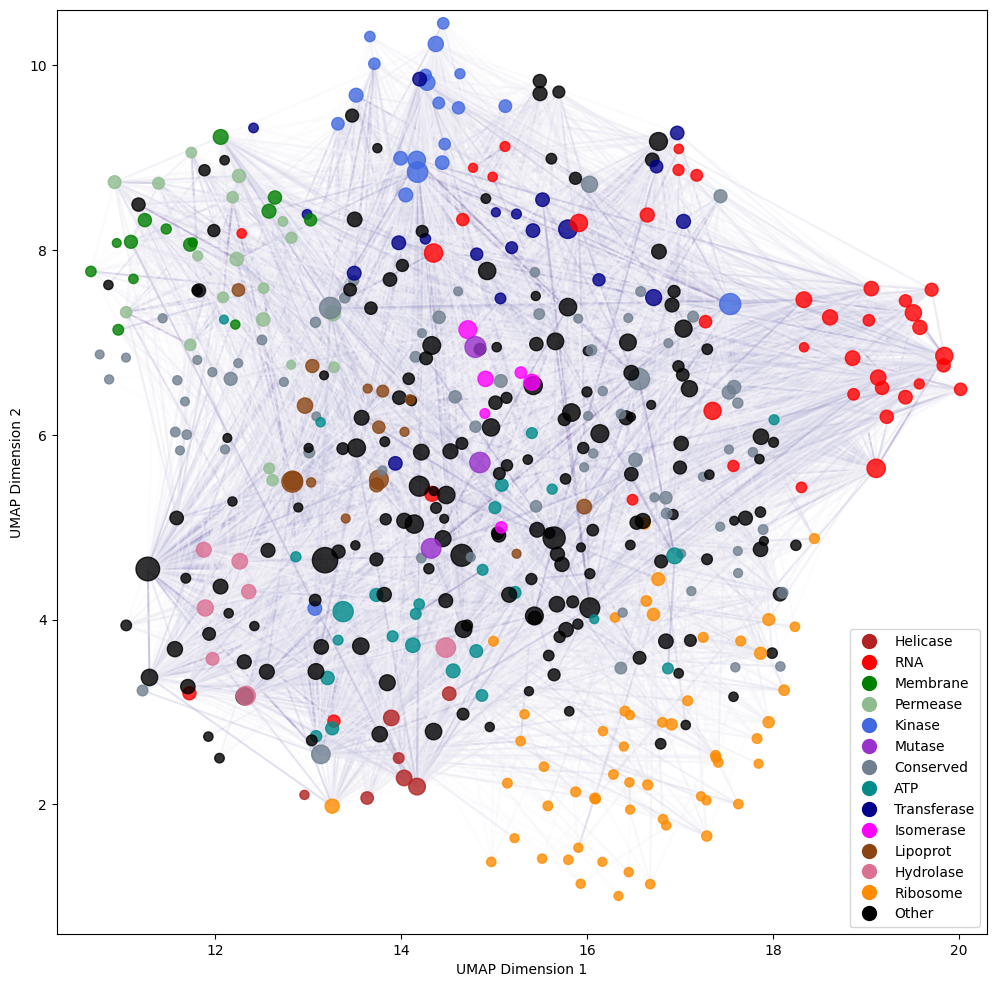

9741


In [ ]:
G = nx.Graph()

fig, ax = plt.subplots(figsize=(12, 12))
ind = 0
coords = {}
for i in df.iterrows():
    x = i[1][3]
    y = i[1][4]
    label = i[1][1]

    G.add_node(ind, pos = (x, y))
    coords[ind] = (x, y)
    ind+=1

edge_list = []

c = 0

color_map = []
ribo = []
rna = []
mem = []
perm = []
kin = []
atp = []
cons = []
mut = []
iso = []
lipo = []
hydro = []
ribo = []
other = []
heli = []
transfer = []
c=0

rna_p = Line2D([0], [0], label='RNA', marker='o', markersize=10,
         markerfacecolor='red', markeredgecolor='red', linestyle='')
heli_p = Line2D([0], [0], label='Helicase', marker='o', markersize=10,
         markerfacecolor='firebrick', markeredgecolor='firebrick', linestyle='')
mem_p = Line2D([0], [0], label='Membrane', marker='o', markersize=10,
         markerfacecolor='green', markeredgecolor='green', linestyle='')
perm_p = Line2D([0], [0], label='Permease', marker='o', markersize=10,
         markerfacecolor='darkseagreen', markeredgecolor='darkseagreen', linestyle='')
kin_p = Line2D([0], [0], label='Kinase', marker='o', markersize=10,
         markerfacecolor='royalblue', markeredgecolor='royalblue', linestyle='')
mut_p = Line2D([0], [0], label='Mutase', marker='o', markersize=10,
         markerfacecolor='darkorchid', markeredgecolor='darkorchid', linestyle='')
iso_p = Line2D([0], [0], label='Isomerase', marker='o', markersize=10,
         markerfacecolor='fuchsia', markeredgecolor='fuchsia', linestyle='')
cons_p = Line2D([0], [0], label='Conserved', marker='o', markersize=10,
         markerfacecolor='slategray', markeredgecolor='slategray', linestyle='')
lipo_p = Line2D([0], [0], label='Lipoprot', marker='o', markersize=10,
         markerfacecolor='saddlebrown', markeredgecolor='saddlebrown', linestyle='')
hydro_p = Line2D([0], [0], label='Hydrolase', marker='o', markersize=10,
         markerfacecolor='palevioletred', markeredgecolor='palevioletred', linestyle='')
ribo_p = Line2D([0], [0], label='Ribosome', marker='o', markersize=10,
         markerfacecolor='darkorange', markeredgecolor='darkorange', linestyle='')
atp_p = Line2D([0], [0], label='ATP', marker='o', markersize=10,
         markerfacecolor='darkcyan', markeredgecolor='darkcyan', linestyle='')
other_p = Line2D([0], [0], label='Other', marker='o', markersize=10,
         markerfacecolor='k', markeredgecolor='k', linestyle='')
transfer_p = Line2D([0], [0], label='Transferase', marker='o', markersize=10,
         markerfacecolor='darkblue', markeredgecolor='darkblue', linestyle='')

names = []
for i in df.iterrows():
    name = i[1][2].replace('[Mycoplasmoides genitalium G37]', '')
    names.append(name)
    if 'helicase' in name:
        color_map.append('firebrick')
        heli.append(c)
    elif 'RNA' in name:
        color_map.append('red')
        rna.append(c)
    elif 'membrane' in name:
        color_map.append('green')
        mem.append(c)
    elif 'permease' in name:
        color_map.append('darkseagreen')
        perm.append(c)
    elif 'kinase' in name:
        color_map.append('royalblue')
        kin.append(c)
    elif 'mutase' in name:
        color_map.append('darkorchid')
        mut.append(c)
    elif 'ATP' in name:
        color_map.append('darkcyan')
        atp.append(c)
    elif 'conser' in name:
        color_map.append('slategray')
        cons.append(c)
    elif 'isomerase' in name:
        color_map.append('fuchsia')
        iso.append(c)
    elif 'lipopro' in name:
        color_map.append('saddlebrown')
        lipo.append(c)
    elif 'hydrola' in name:
        color_map.append('palevioletred')
        hydro.append(c)
    elif 'riboso' in name:
        color_map.append('darkorange')
        ribo.append(c)
    elif 'transfer' in name:
        color_map.append('darkblue')
        transfer.append(c)
    else:
        color_map.append('black')
        other.append(c)

    c+=1

c=0


weights = [1, 0.8, 0.6, 0.4, 0.1]
max_score = np.mean(df2.iloc[0][5:8])

# print(df.head())
# exit()
max_score = np.max(df2['meanDock'])
print(max_score)
c=0
for i in df2.iterrows():
    score = i[1][4]
    name1 = i[1][1]
    name2 = i[1][2]

    docking = np.mean(i[1][5:8])
    index1 = index_dict[name1]
    index2 = index_dict[name2]
    G.add_weighted_edges_from([(index1, index2, docking / max_score)])
    c+=1
    # if c == 500:
    #      break

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
allowed = ribo

for i,j in zip(edges,weights):
    pdock = 0.7110582855676929 * j
    if pdock < 0.22:
    # if i[0] not in allowed and i[1] not in allowed:
        G.remove_edge(i[0],i[1])


edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
d = dict(nx.degree(G))
nx.draw_networkx_nodes(G, nx.get_node_attributes(G, 'pos'),node_color=color_map, alpha=0.8,ax=ax,nodelist=d.keys(), node_size=[v + 40 for v in d.values()]) #]
nx.draw_networkx_edges(G, nx.get_node_attributes(G, 'pos'),alpha=0.3, width=1.5, edge_color=weights, edge_cmap=plt.cm.Purples,ax=ax,)#connectionstyle="arc3,rad=0.4", arrows=True,arrowsize=0,arrowstyle='-'
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')


ax.set_xlim(10.3, 20.3)
ax.set_ylim(0.6, 10.6)
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([heli_p, rna_p, mem_p, perm_p, kin_p, mut_p, cons_p, atp_p, transfer_p, iso_p, lipo_p, hydro_p, ribo_p, other_p])
plt.legend(handles=handles, loc='lower right')
# plt.savefig('/run/media/weeb/Apu/all-vs-all_prots/BigBoiFigure/larg/ProteinNetwork_Final.png', dpi=600)
plt.show()
print(c)



# PPI Highlight
Modify this list to include all the PPI That you want highlighted in the interactive graph. **Make sure to run (hit the play button) this cell and the two below it for changes to be reflected in the figure**

 Note: These edges will not be affected by the toggling functions (e.g., pDockQ)

In [ ]:
## Master list of all chosen to study in vitro. Make sure that you structure the desired edge
## highlights the same way if you want them included. Run this cell and the two below
## for the changes to be reflected in the figure

# highlighted = [('AAC71324.2', 'ABC59633.1'), ('AAC71245.1', 'AAC71472.1'), ('AAC71354.1', 'AAC71402.1'),
#                ('AAC71302.1', 'AAC71627.1'), ('AAC71318.1', 'AAC71324.2'), ('AAC71347.1', 'AAC71519.1'),
#                ('AAC71342.1', 'AAC71390.1'), ('AAC71322.1', 'AAC71557.1'), ('AAC71245.1', 'AAC71488.1'),
#                ('AAC71291.1', 'AAC71602.1'), ('AAC71284.1', 'AAC71630.1'), ('AAC71245.1', 'AAC71257.1'),
#                ('AAC71302.1', 'AAC71361.1'), ('AAC71327.2', 'AAC71625.1')]

highlighted = [('AAC71324.2', 'ABC59633.1'), ('AAC71245.1', 'AAC71472.1'), ('AAC71354.1', 'AAC71402.1'),
               ('AAC71302.1', 'AAC71627.1'), ('AAC71318.1', 'AAC71324.2'), ('AAC71347.1', 'AAC71519.1')]

## Turn off all highlighting (uncomment the line below and all subequent cells)
# highlighted = []

#Interactive Plot Setup

In [ ]:
from bokeh.io import output_notebook, show, output_file
from bokeh.models import (Circle, MultiLine, NodesAndLinkedEdges, TapTool, HoverTool, BoxSelectTool, CheckboxGroup, CustomJS, Button, Legend, LegendItem, Spacer)
from bokeh.plotting import figure, from_networkx
from bokeh.transform import linear_cmap
from bokeh.palettes import Purples256, Spectral4, Plasma256
from bokeh.layouts import column, row
import numpy as np
import networkx as nx

output_notebook()

# Setup for the plot with your actual graph 'G', 'coords', and 'weights' data
plot = figure(
    title="Complete Map of Binary PPI of Mycoplasma Genitalium as Calculated by Alphafold-Multimer",
    width=1200,
    height=800,
    x_axis_label="UMAP Dimension 1",  # Label for x-axis
    y_axis_label="UMAP Dimension 2"   # Label for y-axis
)
degree = list(dict(nx.degree(G)).values())

# Create the graph renderer with your data
graph = from_networkx(G, coords)
graph.node_renderer.data_source.data['name'] = list(G.nodes())
graph.node_renderer.data_source.data['color'] = color_map
graph.node_renderer.data_source.data['size'] = [0.04 + v * 0.0003 for v in d.values()]
graph.node_renderer.data_source.data['label'] = names
graph.node_renderer.data_source.data['degree'] = degree
HOVER_TOOLTIPS_1 = [("Name", "@label"), ('Degree', '@degree')]
plot.add_tools(HoverTool(tooltips=HOVER_TOOLTIPS_1, renderers=[graph.node_renderer]), TapTool(), BoxSelectTool())

# Convert weights to a NumPy array for arithmetic operations
weights_array = np.array(weights)

graph.edge_renderer.data_source.data['weights'] = weights_array
graph.edge_renderer.data_source.data['pDockQ'] = np.round(weights_array * 0.7110582855676929, 2)  # Round to two decimals

graph.edge_renderer.data_source.data['start'] = [edge[0] for edge in G.edges()]
graph.edge_renderer.data_source.data['end'] = [edge[1] for edge in G.edges()]

# Reverse the Plasma256 palette
color_mapper = linear_cmap(field_name='weights', palette=Plasma256[::-1], low=min(weights_array), high=max(weights_array))

# Compute edge colors using weights and the palette
min_weight = np.min(weights_array)
max_weight = np.max(weights_array)
palette = Plasma256[::-1]

# Function to map weight to color
def map_weight_to_color(weight, min_weight, max_weight, palette):
    index = int((weight - min_weight) / (max_weight - min_weight) * (len(palette) - 1))
    return palette[index]

# Assign edge colors using the computed color
edge_colors = [map_weight_to_color(w, min_weight, max_weight, palette) for w in weights_array]

# Identify edges to highlight
highlight_indices = []
for i, edge in enumerate(G.edges()):
    node1, node2 = names[edge[0]].split(' ')[0], names[edge[1]].split(' ')[0]
    if (node1, node2) in highlighted or (node2, node1) in highlighted:
        highlight_indices.append(i)

node_highlight_indices = []
for i, node in enumerate(G.nodes()):
    code = names[node].split(' ')[0]
    for name1, name2 in highlighted:
        if code == name1 or code == name2:
            node_highlight_indices.append(i)

# Initialize line_alpha to be visible by default
line_alpha = [0.5] * len(weights_array)
line_color = edge_colors
line_width = [2] * len(weights_array)  # Normal width

# Highlight specific edges
for index in highlight_indices:
    line_width[index] = 5  # Make highlighted edges thicker
    line_color[index] = Spectral4[0]  # Use blue color for highlighted edges
    line_alpha[index] = 1.0  # Make highlighted edges fully visible

graph.edge_renderer.data_source.data['line_alpha'] = line_alpha
graph.edge_renderer.data_source.data['line_color'] = line_color
graph.edge_renderer.data_source.data['line_width'] = line_width

graph.node_renderer.glyph = Circle(radius='size', fill_color='color', line_width=0)
graph.edge_renderer.glyph = MultiLine(line_alpha='line_alpha', line_color='line_color', line_width='line_width')

plot.renderers.append(graph)

# Checkbox setup for pDockQ thresholds
checkbox_group_pdockq = CheckboxGroup(labels=["pDockQ > 0.30", "pDockQ > 0.35", "pDockQ > 0.40", "pDockQ > 0.45",
                                              "pDockQ > 0.50", "pDockQ > 0.55", "pDockQ > 0.60", "pDockQ > 0.65", "pDockQ > 0.70"], active=[])

# Checkbox setup for node color filtering
checkbox_group_color = CheckboxGroup(labels=["Conserved", "Membrane", "Permease", "Kinase", "Mutase",
                                             "RNA", "ATP", "Isomerase", "Lipoprotein",
                                             "Hydrolase", "Ribosomal", "Other", "Transferase", "Helicase"], active=[])

# Checkbox for highlighting specific edges
martin_ppi_checkbox = CheckboxGroup(labels=["Highlighted PPI"], active=[])

# JavaScript callback to handle both pDockQ and color filtering
callback_combined = CustomJS(args=dict(graph=graph, checkbox_group_pdockq=checkbox_group_pdockq, checkbox_group_color=checkbox_group_color, martin_ppi_checkbox=martin_ppi_checkbox), code="""
    var active_pdockq = checkbox_group_pdockq.active;  // Get active pDockQ checkboxes
    var active_color = checkbox_group_color.active;    // Get active color checkboxes
    var martin_active = martin_ppi_checkbox.active.length > 0;  // Check if Martin PPI checkbox is active

    var edge_data = graph.edge_renderer.data_source.data;
    var node_data = graph.node_renderer.data_source.data;
    var line_alpha = edge_data['line_alpha'].slice(); // Get current line alpha state
    var line_width = edge_data['line_width'].slice();  // Copy current line_width state
    var node_highlight_indices = """ + str(node_highlight_indices) + """;

    var pdockq_factor = 0.7110582855676929;
    var pdockq_thresholds = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.70];
    var thresholds = pdockq_thresholds.map(function(pdockq) { return pdockq / pdockq_factor; });

    var color_map = ["slategray", "green", "darkseagreen", "royalblue", "darkorchid",
                     "red", "darkcyan", "fuchsia", "saddlebrown",
                     "palevioletred", "darkorange", "black", "darkblue", "firebrick"];

    // Determine the maximum threshold based on active pDockQ checkboxes
    var max_threshold = Math.max(...active_pdockq.map(index => thresholds[index]), active_pdockq.length > 0 ? -Infinity : 0);

    // Filter edges based on weight, node colors, and Martin PPI criteria
    for (var i = 0; i < edge_data.weights.length; i++) {
        if (line_alpha[i] === 1.0) {
            // Keep highlighted edges unchanged
            continue;
        }

        var start_node_index = edge_data.start[i];
        var end_node_index = edge_data.end[i];
        var start_node_color = node_data.color[start_node_index];
        var end_node_color = node_data.color[end_node_index];

        // Check if the edge passes the pDockQ threshold
        var pdockq_pass = active_pdockq.length === 0 || edge_data.weights[i] >= max_threshold;

        // Check if the edge passes the color filtering
        var color_pass = false;
        if (active_color.length === 0) {
            color_pass = true;  // No filtering on colors if no active checkboxes
        } else if (active_color.length === 1) {
            // Show edges connected to the single selected type
            color_pass = active_color.some(function(index) {
                return start_node_color === color_map[index] || end_node_color === color_map[index];
            });
        } else if (active_color.length === 2) {
            // Show edges that connect exactly the two selected types
            color_pass = (active_color.includes(color_map.indexOf(start_node_color)) &&
                          active_color.includes(color_map.indexOf(end_node_color)) &&
                          start_node_color !== end_node_color);
        }

        // Check for Martin PPI: if active, ensure edge is connected to a highlighted node
        var martin_pass = !martin_active || (node_highlight_indices.includes(start_node_index) || node_highlight_indices.includes(end_node_index));

        // Set edge visibility based on combined criteria
        if (pdockq_pass && color_pass && martin_pass) {
            line_alpha[i] = 0.5;
            line_width[i] = (martin_active && (node_highlight_indices.includes(start_node_index) || node_highlight_indices.includes(end_node_index))) ? 2 : 2;
        } else {
            line_alpha[i] = 0.0;
            line_width[i] = 0;  // Hide line if it doesn't pass
        }
    }

    edge_data['line_alpha'] = line_alpha;
    edge_data['line_width'] = line_width;
    graph.edge_renderer.data_source.change.emit();
""")

checkbox_group_pdockq.js_on_change('active', callback_combined)
checkbox_group_color.js_on_change('active', callback_combined)
martin_ppi_checkbox.js_on_change('active', callback_combined)

# JavaScript callback to handle node selection, ensuring only visible edges are selected
selection_callback = CustomJS(args=dict(graph=graph), code="""
    var edge_data = graph.edge_renderer.data_source.data;
    var selected_nodes = graph.node_renderer.data_source.selected.indices;
    var line_alpha = edge_data['line_alpha'].slice();

    // Iterate over each edge to check if connected nodes are selected
    for (var i = 0; i < edge_data.start.length; i++) {
        if (line_alpha[i] > 0) { // Only consider visible edges
            var start_index = edge_data.start[i];
            var end_index = edge_data.end[i];
            if (selected_nodes.includes(start_index) || selected_nodes.includes(end_index)) {
                line_alpha[i] = 0.9; // Highlight connected visible edges with alpha 0.9
            }
        }
    }

    edge_data['line_alpha'] = line_alpha;
    graph.edge_renderer.data_source.change.emit();
""")

graph.node_renderer.data_source.selected.js_on_change('indices', selection_callback)

rna_p = plot.scatter([15], [7], size=0, color="red", marker="circle")
mem_p = plot.scatter([15], [7], size=0, color="green", marker="circle")
perm_p = plot.scatter([15], [7], size=0, color="darkseagreen", marker="circle")
kin_p = plot.scatter([15], [7], size=0, color="royalblue", marker="circle")
mut_p = plot.scatter([15], [7], size=0, color="darkorchid", marker="circle")
cons_p = plot.scatter([15], [7], size=0, color="slategray", marker="circle")
atp_p = plot.scatter([15], [7], size=0, color="darkcyan", marker="circle")
iso_p = plot.scatter([15], [7], size=0, color="fuchsia", marker="circle")
lipo_p = plot.scatter([15], [7], size=0, color="saddlebrown", marker="circle")
hydro_p = plot.scatter([15], [7], size=0, color="palevioletred", marker="circle")
ribo_p = plot.scatter([15], [7], size=0, color="darkorange", marker="circle")
other_p = plot.scatter([15], [7], size=0, color="black", marker="circle")
transfer_p = plot.scatter([15], [7], size=0, color='darkblue', marker='circle')
helicase_p = plot.scatter([15], [7], size=0, color='firebrick', marker='circle')
highlighted_p = plot.line(x=[15], y=[7], line_width=5, color=Spectral4[0], alpha=1)

# Custom legend items
legend_items = [
    LegendItem(label="Conserved", renderers=[cons_p]),
    LegendItem(label="Membrane", renderers=[mem_p]),
    LegendItem(label="Permease", renderers=[perm_p]),
    LegendItem(label="Kinase", renderers=[kin_p]),
    LegendItem(label="Mutase", renderers=[mut_p]),
    LegendItem(label="RNA", renderers=[rna_p]),
    LegendItem(label="ATP", renderers=[atp_p]),
    LegendItem(label="Isomerase", renderers=[iso_p]),
    LegendItem(label="Transferase", renderers=[transfer_p]),
    LegendItem(label="Lipoprotein", renderers=[lipo_p]),
    LegendItem(label="Hydrolase", renderers=[hydro_p]),
    LegendItem(label="Helicase", renderers=[helicase_p]),
    LegendItem(label="Ribosomal", renderers=[ribo_p]),
    LegendItem(label="Other", renderers=[other_p]),
    LegendItem(label="Highlighted PPI", renderers=[highlighted_p]),  # Highlighted PPI legend item

]

# Add legend to the plot
legend = Legend(items=legend_items, location="bottom_right")
plot.add_layout(legend)

# Set selection and hover glyphs
graph.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[1], line_width=4, line_alpha='line_alpha')
graph.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=4, line_alpha='line_alpha')
graph.node_renderer.selection_glyph = Circle(radius='size', fill_color=Spectral4[2])
graph.node_renderer.hover_glyph = Circle(radius='size', fill_color=Spectral4[1])
graph.selection_policy = NodesAndLinkedEdges()
graph.inspection_policy = NodesAndLinkedEdges()

# Button to reset graph
reset_button = Button(label="Reset Graph", button_type="success")

reset_callback = CustomJS(args=dict(graph=graph, checkbox_group_pdockq=checkbox_group_pdockq, checkbox_group_color=checkbox_group_color, martin_ppi_checkbox=martin_ppi_checkbox), code="""
    // Reset all edges to visible and reset checkboxes
    var edge_data = graph.edge_renderer.data_source.data;
    var line_alpha = edge_data['line_alpha'].slice(); // Get current line alpha state
    var line_width = edge_data['line_width'].slice();  // Copy current line_width state
    for (var i = 0; i < edge_data.weights.length; i++) {
        if (line_alpha[i] !== 1.0) { // Only reset non-highlighted edges
            line_alpha[i] = 0.5;
            line_width[i] = 2;  // Reset to default width
        }
    }
    edge_data['line_alpha'] = line_alpha;
    edge_data['line_width'] = line_width;
    graph.edge_renderer.data_source.change.emit();

    // Reset checkboxes
    checkbox_group_pdockq.active = [];
    checkbox_group_color.active = [];
    martin_ppi_checkbox.active = [];
""")

reset_button.js_on_event('button_click', reset_callback)

# Layout with legend at the bottom right and checkboxes beside the plot
layout = row(
    plot,
    column(
        Spacer(height=0),  # Add some space between the legend and checkboxes
        checkbox_group_color,
        checkbox_group_pdockq,
        martin_ppi_checkbox,
        reset_button,
    ),
)



# Interactive Plot Display
Interative plot currently supports:
- Hovering over node shows protein number + description and degree (# edges in full graph)
- Clicking on node highlights all edges connected that node in the current view
- pDockQ filtering by value
- Single protein type filtering
- Filtering with two protein types at once (edges connected to BOTH types only)
- Node pairs (edges) listed in "highlighted" list (see cell above), alongside all edges connected to only those nodes
- Any combination of these functions
- Graph factory reset



Spatial coordinates for nodes are obtained by performing [UMAP projections](https://umap-learn.readthedocs.io/en/latest/) on dense representations generated from [Proteinfer](https://google-research.github.io/proteinfer/), which predicts protein/enzyme function from FASTA. Node colors are independently obtained from the protein descripton string (from Blast? @Martin) and exemplifies how proteins with similar function have similar spatial coordinates.

Edge weight is proportional to the empirical [pDockQ](https://www.nature.com/articles/s41467-022-28865-w) score:

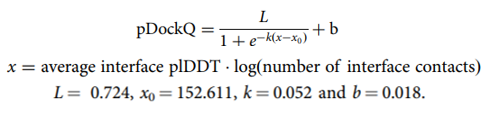

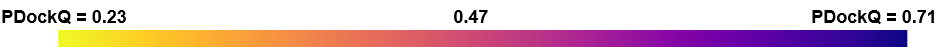

If edges get stuck on the graph and the reset button doesn't work, **refresh the page**

In [ ]:
output_file("networkx_graph.html")
show(layout)